# MNIST Handwritten Digit Prediction Model

## Introduction
This project utilizes a Convolutional Neural Network (CNN) to predict handwritten digits from the MNIST dataset.

## Dataset Understanding

### Load and Explore the Dataset
First, let's load and explore the MNIST dataset.



In [22]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [77]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [78]:
# Display dataset information
print("No. of images in Training Dataset :", x_train.shape[0])
print("No. of images in Testing Dataset :", x_test.shape[0])
print(f"Dimension of the images : {x_train.shape[1]}x{x_train.shape[2]}")

No. of images in Training Dataset : 60000
No. of images in Testing Dataset : 10000
Dimension of the images : 28x28


In [206]:
# Function to plot an image

def plot_image(image, label , index):
    plt.imshow(image[index])
    plt.title(label[index])
    plt.axis('off')
    plt.show()

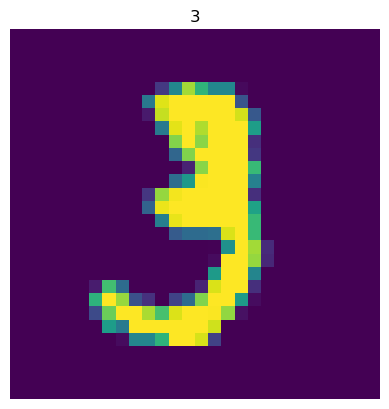

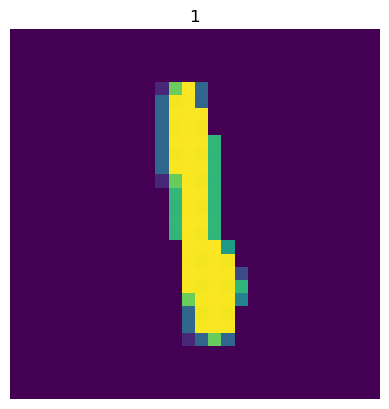

In [207]:
# Display sample images

plot_image(x_train , y_train , 10)
plot_image(x_train , y_train , 200)

## Data Preprocessing

### Resizing
First we will resize the image so that we can feed them to our CNN model

In [208]:
(x_train.shape , y_train.shape )

((60000, 28, 28, 1), (60000,))

In [209]:
( x_test.shape , y_test.shape )

((10000, 28, 28, 1), (10000,))

In [86]:
x_train = x_train.reshape((60000 , 28 , 28 , 1))
x_test = x_test.reshape((10000, 28 , 28 , 1))

Here we can clearly see that adding one extra dimesion doesn't change our image at all.

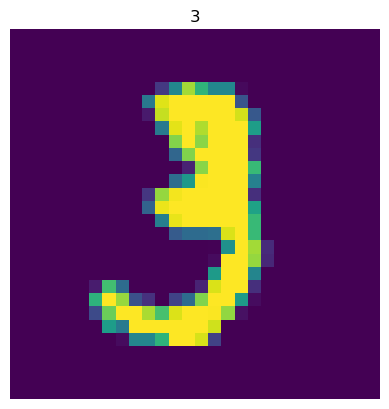

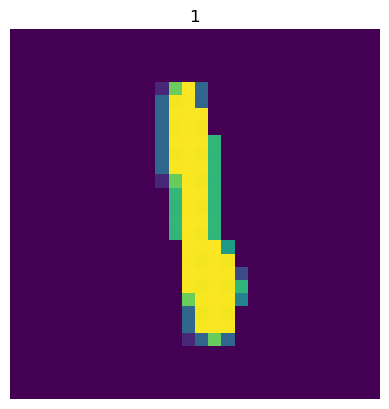

In [210]:
plot_image(x_train , y_train , 10)
plot_image(x_train , y_train , 200)

### Normalisation

Now we will apply normalization to convert the range of images to [ 0,1 ]

In [90]:
x_train = x_train/255

In [91]:
x_test = x_test/255

Normalization also doesn't affect the weightage of pixels. It just scale it down 

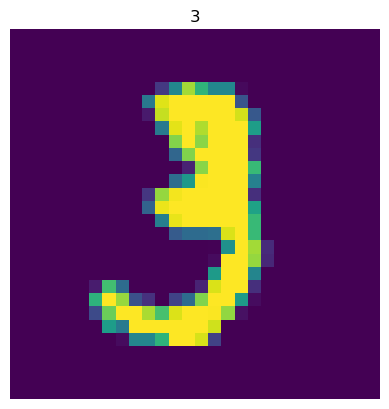

In [92]:
plot_image(x_train , y_train , 10)

In [93]:
(x_train.shape,y_test.shape)

((60000, 28, 28, 1), (10000,))

## Model Architecture
### Convolutional Neural Network (CNN)
The CNN architecture is designed to extract meaningful features from the handwritten digit images.



In [94]:
from tensorflow.keras import layers
from tensorflow.keras import Sequential

In [194]:
model = Sequential([
    # Input layer for CNN
    layers.Conv2D(64,(3,3), activation='relu',input_shape=x_train[0].shape), # hidden layer
    layers.MaxPool2D((2,2)), 
    
    layers.Conv2D(32,(3,3), activation='relu'),# hidden layer
    layers.MaxPool2D((2,2)),
    
    layers.Conv2D(32,(3,3), activation='relu'), # Feature map
    
    layers.Flatten(), # Before Feeding the outputs of CNN to ANN,
                      # we need to flatten it
    
    layers.Dense(units=64,activation = 'relu'), # hidden layer
    layers.Dense(units=32,activation = 'relu'), # hidden layer
    
    layers.Dense(units=10,activation = 'softmax')
])

model.compile(loss = 'sparse_categorical_crossentropy' , optimizer = 'adam' , metrics = ['accuracy'])
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)                   │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 11, 11, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 5, 5, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 3, 3, 32)            │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 288)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 64)                  │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 49,258 (192.41 KB)

 Trainable params: 49,258 (192.41 KB)

 Non-trainable params: 0 (0.00 B)

## Model Training
### Training Process
Train the model on the training data and validate using a validation split.



In [195]:
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 18s 21ms/step - accuracy: 0.7540 - loss: 0.7131 - val_accuracy: 0.9664 - val_loss: 0.1093
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 15s 20ms/step - accuracy: 0.9744 - loss: 0.0833 - val_accuracy: 0.9797 - val_loss: 0.0712
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 15s 20ms/step - accuracy: 0.9842 - loss: 0.0503 - val_accuracy: 0.9847 - val_loss: 0.0494
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 15s 20ms/step - accuracy: 0.9882 - loss: 0.0383 - val_accuracy: 0.9876 - val_loss: 0.0425
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 15s 20ms/step - accuracy: 0.9896 - loss: 0.0319 - val_accuracy: 0.9892 - val_loss: 0.0400
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 15s 20ms/step - accuracy: 0.9917 - loss: 0.0258 - val_accuracy: 0.9833 - val_loss: 0.0567
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 15s 20ms/step - accuracy: 0.9918 - loss: 0.0257 - val_accuracy: 0.9881 - val_loss: 0.0434
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 14s 19ms/step - accuracy: 0.9941 - loss: 0.0194 - 

## Model Evaluation
Evaluate the trained model on the test dataset.



In [211]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {accuracy * 100:.2f}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9886 - loss: 0.0418
Test accuracy: 99.10%


## Model Prediction

In [196]:
prediction = model.predict(x_test)
prediction_labels = np.argmax(prediction , axis = 1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


In [217]:
def predict(image, label , index):
    pred = model.predict(image[index].reshape(1,28,28,1))
    pred_label = np.argmax(pred , axis = 1)[0]
    plt.imshow(image[index])
    plt.axis('off')
    plt.show()
    print("Ground Truth Label :", label[index])
    print("Prediction :" , pred_label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


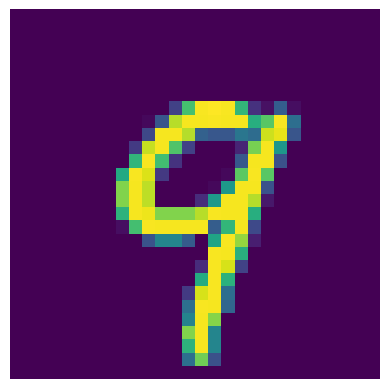

Ground Truth Label : 9
Prediction : 9


In [218]:
predict(x_test , y_test , 12)

In [219]:
model.save('model\MNIST.h5')